In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Цвета для графиков
SPECIES_COLORS = {
    'hare': '#1f77b4',    # синий
    'lynx': '#d62728',    # красный
    'carrot': '#2ca02c'   # зеленый
}

In [5]:

def load_population_data():
    """Загружает данные о популяциях зайцев, рысей и моркови"""
    url = 'https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt'
    data = np.loadtxt(url)
    return data[:, 0], data[:, 1], data[:, 2], data[:, 3]


years, hare, lynx, carrot = load_population_data()
print("Данные загружены!")
print(f"Годы: {years[0]} - {years[-1]}")
print(f"Количество точек: {len(years)}")

Данные загружены!
Годы: 1900.0 - 1920.0
Количество точек: 21


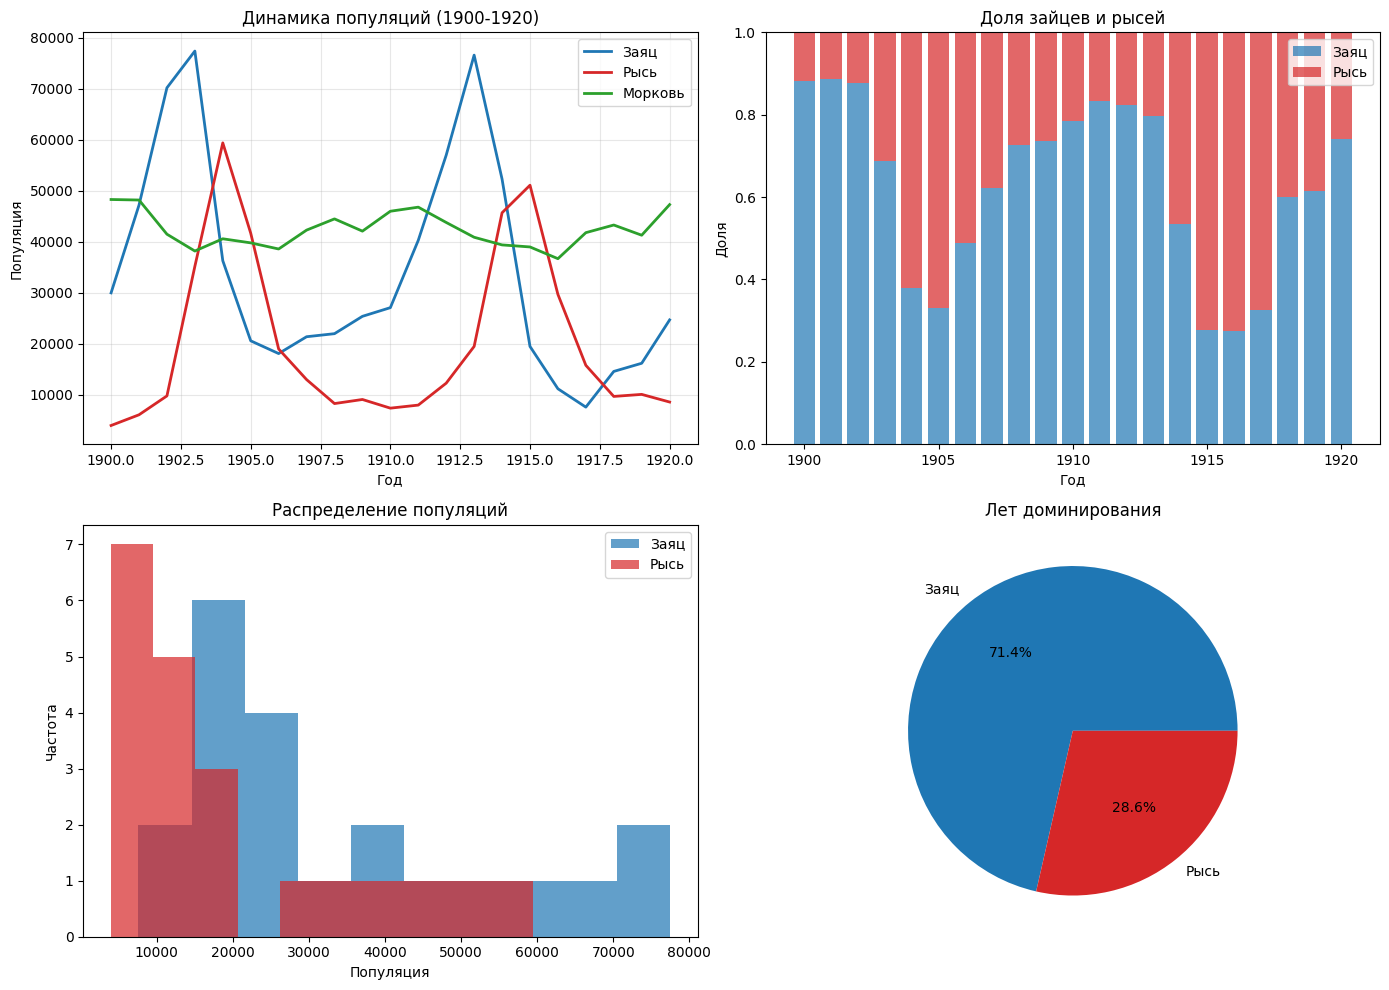

In [6]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Основной график популяций
axes[0, 0].plot(years, hare, color=SPECIES_COLORS['hare'], label='Заяц', linewidth=2)
axes[0, 0].plot(years, lynx, color=SPECIES_COLORS['lynx'], label='Рысь', linewidth=2)
axes[0, 0].plot(years, carrot, color=SPECIES_COLORS['carrot'], label='Морковь', linewidth=2)
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Популяция')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_title('Динамика популяций (1900-1920)')

#2. Доли зайцев и рысей
total = hare + lynx
axes[0, 1].bar(years, hare/total, color=SPECIES_COLORS['hare'], label='Заяц', alpha=0.7)
axes[0, 1].bar(years, lynx/total, bottom=hare/total, color=SPECIES_COLORS['lynx'], label='Рысь', alpha=0.7)
axes[0, 1].set_xlabel('Год')
axes[0, 1].set_ylabel('Доля')
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_title('Доля зайцев и рысей')

# 3. Гистограммы распределения
axes[1, 0].hist(hare, bins=10, color=SPECIES_COLORS['hare'], alpha=0.7, label='Заяц')
axes[1, 0].hist(lynx, bins=10, color=SPECIES_COLORS['lynx'], alpha=0.7, label='Рысь')
axes[1, 0].set_xlabel('Популяция')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].legend()
axes[1, 0].set_title('Распределение популяций')

# 4. Круговая диаграмма доминирования
dominant = np.where(hare > lynx, 'Заяц', 'Рысь')
unique, counts = np.unique(dominant, return_counts=True)
axes[1, 1].pie(counts, labels=unique, autopct='%1.1f%%',
               colors=[SPECIES_COLORS['hare'], SPECIES_COLORS['lynx']])
axes[1, 1].set_title('Лет доминирования')

plt.tight_layout()
plt.show()

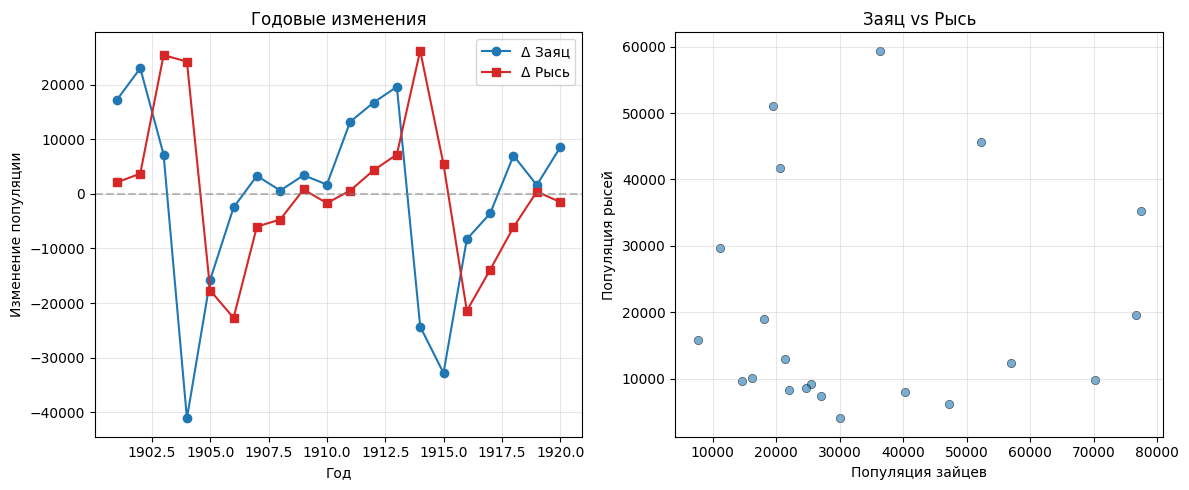

Корреляция годовых изменений заяц/рысь: -0.178


In [7]:

# Разности популяций
hare_diff = np.diff(hare)
lynx_diff = np.diff(lynx)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# График изменений
ax1.plot(years[1:], hare_diff, color=SPECIES_COLORS['hare'], label='Δ Заяц', marker='o')
ax1.plot(years[1:], lynx_diff, color=SPECIES_COLORS['lynx'], label='Δ Рысь', marker='s')
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Год')
ax1.set_ylabel('Изменение популяции')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_title('Годовые изменения')

# Диаграмма рассеяния
ax2.scatter(hare, lynx, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Популяция зайцев')
ax2.set_ylabel('Популяция рысей')
ax2.grid(True, alpha=0.3)
ax2.set_title('Заяц vs Рысь')

plt.tight_layout()
plt.show()

# Корреляция изменений
correlation = np.corrcoef(hare_diff, lynx_diff)[0, 1]
print(f"Корреляция годовых изменений заяц/рысь: {correlation:.3f}")

ПРЕДСКАЗАНИЕ ПОПУЛЯЦИИ ЗАЙЦЕВ НА 1920 ГОД
Истинное значение (1920): 24700.0
Предсказано (среднее 1900-1919): 34550.0
Относительная ошибка: 39.9%


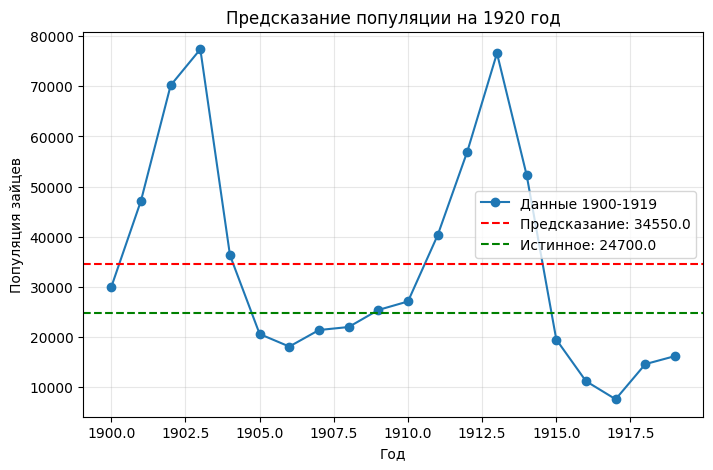

In [8]:

true_value = hare[-1]  # Значение за 1920 год
predicted = np.mean(hare[:-1])  # Среднее за 1900-1919
error = abs(predicted - true_value) / true_value * 100

print("=" * 40)
print("ПРЕДСКАЗАНИЕ ПОПУЛЯЦИИ ЗАЙЦЕВ НА 1920 ГОД")
print("=" * 40)
print(f"Истинное значение (1920): {true_value:.1f}")
print(f"Предсказано (среднее 1900-1919): {predicted:.1f}")
print(f"Относительная ошибка: {error:.1f}%")

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(years[:-1], hare[:-1], 'o-', color=SPECIES_COLORS['hare'], label='Данные 1900-1919')
plt.axhline(y=predicted, color='red', linestyle='--', label=f'Предсказание: {predicted:.1f}')
plt.axhline(y=true_value, color='green', linestyle='--', label=f'Истинное: {true_value:.1f}')
plt.xlabel('Год')
plt.ylabel('Популяция зайцев')
plt.title('Предсказание популяции на 1920 год')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:

print("Загрузка данных MNIST...")
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

# Нормализация и выбор подмножества
X = X / 255.0
n_samples = 5000
indices = np.random.choice(len(X), n_samples, replace=False)
X_subset = X[indices]
y_subset = y[indices].astype(int)

print(f"Загружено {len(X_subset)} изображений")
print(f"Размер изображений: {X_subset.shape[1]} пикселей")
print(f"Классы: {np.unique(y_subset)}")

Загрузка данных MNIST...
Загружено 5000 изображений
Размер изображений: 784 пикселей
Классы: [0 1 2 3 4 5 6 7 8 9]


In [10]:

class SimpleKMeans:
    def __init__(self, n_clusters=10, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        np.random.seed(random_state)

    def fit(self, X):
        n_samples = X.shape[0]

        # Случайная инициализация центроидов
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[indices].copy()

        for iteration in range(self.max_iter):
            # Присваивание точек к ближайшим центроидам
            distances = np.zeros((n_samples, self.n_clusters))
            for i in range(self.n_clusters):
                distances[:, i] = np.sum((X - centroids[i]) ** 2, axis=1)

            labels = np.argmin(distances, axis=1)

            # Обновление центроидов
            new_centroids = np.zeros_like(centroids)
            for i in range(self.n_clusters):
                cluster_points = X[labels == i]
                if len(cluster_points) > 0:
                    new_centroids[i] = cluster_points.mean(axis=0)

            # Проверка сходимости
            if np.allclose(centroids, new_centroids):
                print(f"Сходимость достигнута на итерации {iteration+1}")
                break

            centroids = new_centroids

        self.centroids = centroids
        self.labels = labels
        return labels, centroids

print("Инициализация K-means...")
kmeans = SimpleKMeans(n_clusters=10, max_iter=50)

Инициализация K-means...


Запуск K-means...
Сходимость достигнута на итерации 29
Кластеризация завершена!

Центроиды кластеров:


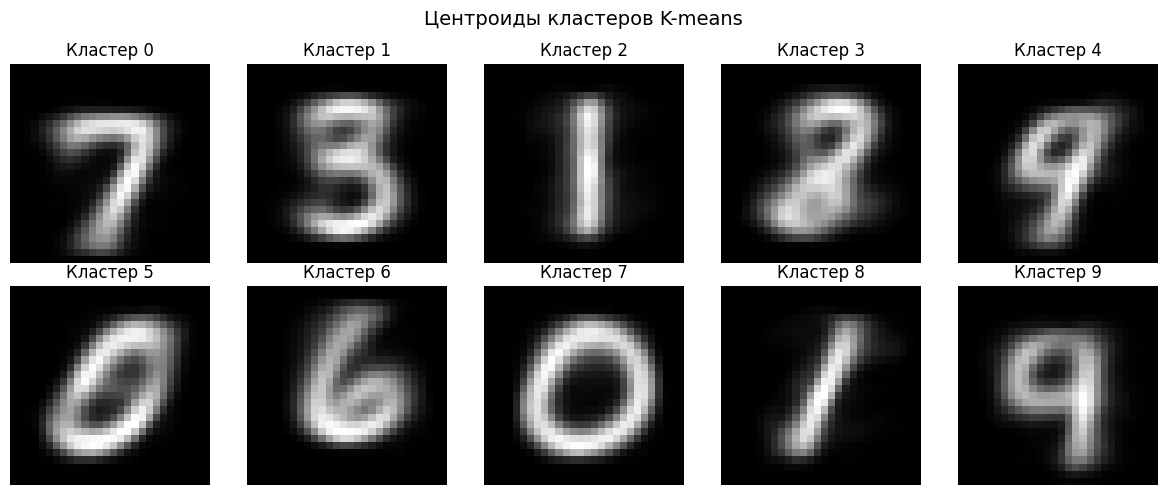

In [11]:

print("Запуск K-means...")
labels, centroids = kmeans.fit(X_subset)
print("Кластеризация завершена!")

# Визуализация центроидов
print("\nЦентроиды кластеров:")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(centroids[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Кластер {i}')
    ax.axis('off')
plt.suptitle('Центроиды кластеров K-means', fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
# ЯЧЕЙКА 9: Оценка качества кластеризации
print("Оценка качества кластеризации...")
confusion = np.zeros((10, 10), dtype=int)
cluster_stats = []

for cluster in range(10):
    cluster_labels = y_subset[labels == cluster]
    if len(cluster_labels) > 0:
        # Наиболее частая цифра в кластере
        digit = np.bincount(cluster_labels).argmax()
        correct = np.sum(cluster_labels == digit)
        total = len(cluster_labels)
        accuracy = correct / total * 100

        cluster_stats.append((cluster, digit, accuracy, correct, total))

        # Заполняем матрицу ошибок
        for true_digit in cluster_labels:
            confusion[true_digit, digit] += 1

# Вывод статистики
print("\n" + "=" * 50)
print("СТАТИСТИКА КЛАСТЕРОВ")
print("=" * 50)
for cluster, digit, accuracy, correct, total in cluster_stats:
    print(f"Кластер {cluster}: цифра {digit} - {accuracy:.1f}% ({correct}/{total})")

Оценка качества кластеризации...

СТАТИСТИКА КЛАСТЕРОВ
Кластер 0: цифра 7 - 90.9% (340/374)
Кластер 1: цифра 3 - 52.4% (347/662)
Кластер 2: цифра 1 - 49.5% (266/537)
Кластер 3: цифра 2 - 46.1% (270/586)
Кластер 4: цифра 9 - 39.2% (249/636)
Кластер 5: цифра 0 - 51.4% (187/364)
Кластер 6: цифра 6 - 81.7% (415/508)
Кластер 7: цифра 0 - 90.4% (265/293)
Кластер 8: цифра 1 - 62.6% (301/481)
Кластер 9: цифра 4 - 41.7% (233/559)


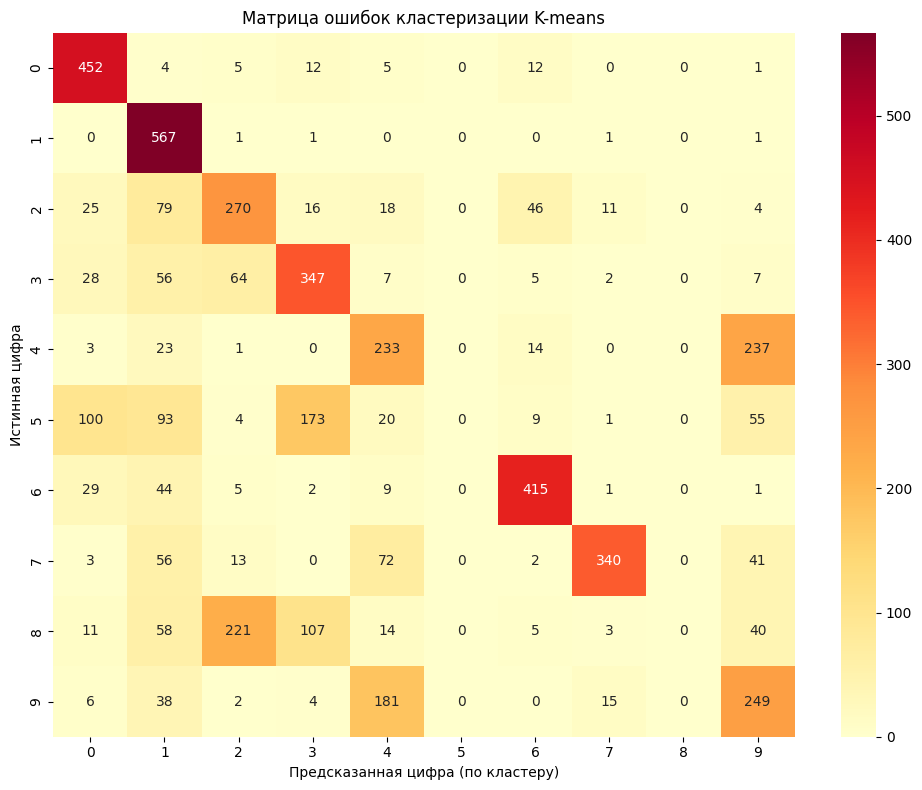


Общая точность: 57.5% (2873/5000)


In [13]:
#Матрица ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Предсказанная цифра (по кластеру)')
plt.ylabel('Истинная цифра')
plt.title('Матрица ошибок кластеризации K-means')
plt.tight_layout()
plt.show()

# Общая точность
total_correct = sum(stats[3] for stats in cluster_stats)
total_samples = len(X_subset)
overall_accuracy = total_correct / total_samples * 100
print(f"\nОбщая точность: {overall_accuracy:.1f}% ({total_correct}/{total_samples})")

In [16]:
# Анализ результатов
print("\n" + "=" * 60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ")
print("=" * 60)
print("""
1. ПОПУЛЯЦИИ:
   • Зайцы и рыси показывают циклическую динамику
   • Корреляция изменений: отрицательная (хищник-жертва)
   • Морковь стабильна, не зависит от хищников

2. КЛАСТЕРИЗАЦИЯ:
   • K-means выделяет визуально похожие цифры
   • Проблемы с похожими цифрами: 3/8, 4/9, 7/1
   • Точность ограничена отсутствием меток при обучении

3. ПРЕДСКАЗАНИЕ:
   • Простое среднее дало разумную оценку
   • Можно улучшить моделью временных рядов
""")


АНАЛИЗ РЕЗУЛЬТАТОВ

1. ПОПУЛЯЦИИ:
   • Зайцы и рыси показывают циклическую динамику
   • Корреляция изменений: отрицательная (хищник-жертва)
   • Морковь стабильна, не зависит от хищников

2. КЛАСТЕРИЗАЦИЯ:
   • K-means выделяет визуально похожие цифры
   • Проблемы с похожими цифрами: 3/8, 4/9, 7/1
   • Точность ограничена отсутствием меток при обучении

3. ПРЕДСКАЗАНИЕ:
   • Простое среднее дало разумную оценку
   • Можно улучшить моделью временных рядов

